# Day 32

# 분류 성능 평가

분류 문제는 회귀 분석과 달리 모수에 대한 t-검정, 신뢰 구간(confidence interval) 추정 등이 쉽지 않기 때문에 이를 보완하기 위해 다양한 성능 평가 기준이 필요하다.

## Scikit-Learn 에서 지원하는 분류 성능 평가 명령

* `sklearn.metrics` 서브 패키지
 * `confusion_matrix()`
 * `classfication_report()`
 * `accuracy_score(y_true, y_pred)`
 * `precision_score(y_true, y_pred)`
 * `recall_score(y_true, y_pred)`
 * `fbeta_score(y_true, y_pred, beta)`
 * `f1_score(y_true, y_pred)`


## 분류 결과표 Confusion Matrix

분류 결과표는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과이다.

원래 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.



| | 예측 클래스 0 | 예측 클래스 1 | 예측 클래스 2 | 
|-|-|-|-|
| 원 클래스 0 | <small>원 클래스가 0, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 0, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 0, 예측 클래스가 2인 표본의 수</small> |
| 원 클래스 1 | <small>원 클래스가 1, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 1, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 1, 예측 클래스가 2인 표본의 수</small> |
| 원 클래스 2 | <small>원 클래스가 2, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 2, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 2, 예측 클래스가 2인 표본의 수</small> |


In [227]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [228]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## 이진 분류 결과표 Binary Confusion Matrix

클래스가 0과 1 두 종류 밖에 없는 경우에는 일반적으로 클래스 이름을 "Positive"와 "Negative"로 표시한다. 

또, 분류 모형의 예측 결과가 맞은 경우, 즉 Positive를 Positive라고 예측하거나 Negative를 Negative라고 예측한 경우에는 "True"라고 하고 예측 결과가 틀린 경우, 즉 Positive를 Negative라고 예측하거나 Negative를 Positive라고 예측한 경우에는 "False"라고 한다.

이 경우의 이진 분류 결과의 명칭과 결과표는 다음과 같다. 

| | Positive라고 예측  | Negative라고 예측 | 
|-|-|-|
| 실제 Positive | True Positive   |  False Negative |             
| 실제 Negative | False Positive  |  True Negative  |   

### FDS(Fraud Detection System)의 예

FDS(Fraud Detection System)는 금융 거래, 회계 장부 등에서 잘못된 거래, 사기 거래를 찾아내는 시스템을 말한다. FDS의 예측 결과가 Positive 이면  사기 거래라고 예측한 것이고 Negative 이면 정상 거래라고 예측한 것이다. 이 결과가 사실과 일치하는지 틀리는지에 따라 다음과 같이 말한다.

* True Positive: 사기를 사기라고 정확하게 예측
* True Negative: 정상을 정상이라고 정확하게 예측
* False Positive: 정상을 사기라고 잘못 예측
* False Negative: 사기를 정상이라고 잘못 예측

|                     | 사기 거래라고 예측                | 정상 거래라고 예측                         | 
| --------------------| ------------------------ | --------------------------------- |
| 실제로 사기 거래  | True Positive            |  False Negative                   |             
| 실제로 정상 거래  | False Positive            |  True Negative                    |   

## 평가 스코어

**모델의 fitting은 accuracy로한다.**

### Accuracy 정확도
* 전체 샘플 중 맞게 예측한 샘플 수의 비율
* 모형 트레이닝 즉 최적화에서 목적함수로 사용  
 
 $$\text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN}$$

### Precision 정밀도
* 클래스에 속한다고 출력한 샘플 중 실제로 클래스에 속하는 샘플 수의 비율
* FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율. 유죄율
 
$$\text{precision} = \dfrac{TP}{TP + FP}$$

### Recall 재현율
* TPR: true positive rate
* 실제 클래스에 속한 샘플 중에 클래스에 속한다고 출력한 샘플의 수
* FDS의 경우, 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율. 검거율
* sensitivity(민감도)
 
$$\text{recall} = \dfrac{TP}{TP + FN}$$

### Fall-Out
* FPR: false positive rate
* 실제 클래스에 속하지 않는 샘플 중에 클래스에 속한다고 출력한 샘플의 수
* FDS의 경우, 실제 정상 거래 중에서 FDS가 사기 거래라고 예측한 거래의 비율, 원죄(寃罪)율
 
$$\text{fallout} = \dfrac{FP}{FP + TN}$$

### F (beta) score
* 정밀도(Precision)과 재현율(Recall)의 가중 조화 평균
 
$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$


* F1 score
 * beta = 1 

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$

In [229]:
from sklearn.metrics import *
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



In [230]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
print(classification_report(y_true, y_pred, target_names=["ant", "bird", "cat"]))

             precision    recall  f1-score   support

        ant       0.67      1.00      0.80         2
       bird       0.00      0.00      0.00         1
        cat       0.67      0.67      0.67         3

avg / total       0.56      0.67      0.60         6



/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## ROC 커브

ROC(Receiver Operator Characteristic) 커브는 클래스 판별 기준값의 변화에 따른 Fall-out과 Recall의 변화를 시각화한 것이다.

모든 이진 분류 모형은 판별 평면으로부터의 거리에 해당하는 판별 함수(discriminant function)를 가지며 판별 함수 값이 음수이면 0인 클래스, 양수이면 1인 클래스에 해당한다고 판별한다. 즉 0 이 클래스 판별 기준값이 된다. ROC 커브는 이 클래스 판별 기준값이 달라진다면 판별 결과가 어떻게 달라지는지는 표현한 것이다.

Scikit-Learn 의 Classification 클래스는 판별 함수 값을 계산하는 `decision_function` 메서드를 제공한다. ROC 커브는 이 판별 함수 값을 이용하여 다음과 같이 작성한다.

1. 모든 표본 데이터에 대해 판별 함수 값을 계산한다.
2. 계산된 판별 함수 값을 정렬한다.
3. 만약 0이 아닌 가장 작은 판별 함수값을 클래스 구분 기준값으로 하면 모든 표본은 클래스 1(Positive)이 된다. 
   이 때의 Fall-out과 Recall을 계산하면 Recall과 Fall-out이 모두 1이된다.
4. 두번째로 작은 판별 함수값을 클래스 구분 기준값으로 하면 판별 함수 값이 가장 작은 표본 1개를 제외하고 나머지 표본은 클래스 1(Positive)이 된다. 마찬가지로 이 때의 Fall-out과 Recall을 계산하여 기록한다.
5. 가장 큰 판별 함수값이 클래스 구분 기준값이 될 때까지 이를 반복한다. 이 때는 모든 표본이 클래스 0(Negative)으로 판별되며 Recall과 Fall-out이 모두 0이된다.

일반적으로 클래스 판별 기준이 변화함에 따라 Recall과 Fall-out은 같이 증가하거나 감소한다. 
Fall-out보다 Recall이 더 빠르게 증가하는 모형은 좋은 모형으로 생각할 수 있다.

In [231]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, weights=[0.99, 0.01],
                           class_sep=0.5, random_state=0)

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.15).fit(X, y)
y_hat2 = model2.predict(X)

In [233]:
print(confusion_matrix(y, y_hat1))

[[986   0]
 [ 13   1]]


In [234]:
print(confusion_matrix(y, y_hat2))

[[986   0]
 [ 13   1]]


In [235]:
print(classification_report(y, model1.predict(X)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       986
          1       1.00      0.07      0.13        14

avg / total       0.99      0.99      0.98      1000



In [236]:
print(classification_report(y, model2.predict(X)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       986
          1       1.00      0.07      0.13        14

avg / total       0.99      0.99      0.98      1000



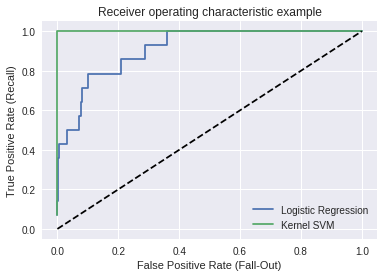

In [237]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

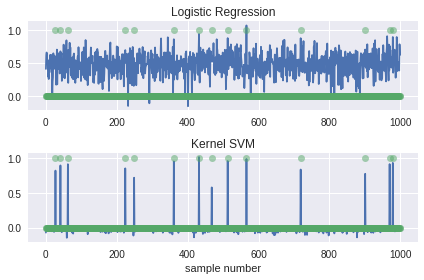

In [238]:
plt.subplot(211)
plt.plot(model1.decision_function(X) * 0.1 + 1)
plt.plot(y, 'o', alpha=0.5)
plt.title("Logistic Regression")

plt.subplot(212)
plt.plot(model2.decision_function(X) + 1)
plt.plot(y, 'o', alpha=0.5)
plt.title("Kernel SVM")
plt.xlabel("sample number")

plt.tight_layout()
plt.show()

## AUC (Area Under the Curve)

AUC는 ROC curve의 면적을 뜻한다. Fall-Out 대비 Recall 값이 클 수록 AUC가 1에 가까운 값이며 민감한 모형이다.

In [239]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.91227180527383367, 1.0)

# 나이브 베이즈 분류 모형

나이브 베이즈 분류 모형(Naive Bayes classification model)은 대표적인 생성 모형이다. 

타겟 변수 $y$의 각 클래스 $\{C_1,\cdots,C_K\}$ 에 대한 독립 변수 $x$의 조건부 확률 분포 정보 $p(x \mid y = C_k)$ 를 사용하여 주어진 새로운 독립 변수 값 $x_{\text{new}}$에 대한 타켓 변수의 각 클래스의 조건부 확률 $p(y = C_k \mid x_{\text{new}})$ 를 추정한 후 가장 조건부 확률이 큰 클래스 $k$를 선택하는 방법이다.



## 조건부 확률의 계산

다음과 같이 베이즈 규칙을 사용하여 조건부 확률 $p(y = C_k \mid x_{\text{new}})$ 을 계산한다.

$$
P(y = C_k \mid x_{\text{new}}) = \dfrac{P(x_{\text{new}} \mid y = C_k)\; P(y = C_k)}{P(x_{\text{new}})}
$$

최종적으로는 각 클래스 $k$에 대한 확률을 비교하여 최고값을 계산하기만 하면 되므로 분모에 있는 주변 확률(marginal probability) ${P(x_{\text{new}})}$은 계산하지 않는다.

$$
P(y = C_k \mid x_{\text{new}}) \;\; \propto \;\; P(x_{\text{new}} \mid y = C_k) \; P(y = C_k)
$$


여기에서 사전 확률(prior) $P(y = C_k)$는 다음과 같이 쉽게 구할 수 있다.

$$
P(y = C_k) \approx \frac{\text{number of samples with }y = C_k}{\text{number of all samples}}
$$

$y$에 대한 $x$의 조건부 확률인 likelihood는 일반적으로 정규 분포나 베르누이 분포와 같은 특정한 모형을 가정하여 다음과 같이 계산한다.

1. $P(x \mid y = C_k)$ 가 특정한 확률 분포 모형을 따른다고 가정한다.
2. 트레이닝 데이터 $\{x_1, \cdots, x_N\}$을 사용하여 이 모형의 모수(parameter)를 구한다.
3. 모수를 알고 있으므로 새로운 독립 변수 값 $x_{\text{new}}$이 어떤 값이 되더라도 $P(x_{\text{new}} \mid y = C_k)$ 를 계산할 수 있다.

## likelihood 모형

likelihood의 모형으로 많이 사용하는 것은 다음과 같다.

* 베르누이 분포
  * $x$가 0 또는 1 값만을 가질 수 있다.
  * $x$가 1 이 될 확률은 고정되어 있다.
  * 예: 동전을 던진 결과로 어느 동전을 던졌는지를 찾아내는 모형
  
$$ P(x_i \mid y = C_k) = \theta_k^x (1-\theta_k)^{(1-x_i)} $$


* 다항 분포 
  * $(x_1, \ldots, x_n)$ 이 0 또는 양의 정수
  * 예: 주사위를 던진 결과로 어느 주사위를 던졌는지를 찾아내는 모형

$$ P(x_1, \ldots, x_n \mid y = C_k) = \prod_i \theta_k^{x_i}$$


* 가우시안 정규 분포
  * $x$가 실수로 특정한 값 근처
  * 예: 시험 점수로 학생이 누구인지를 찾아내는 모형
  
  $$ P(x_i \mid y = C_k) = \dfrac{1}{\sqrt{2\pi\sigma_k^2}} \exp \left(-\dfrac{(x_i-\mu_k)^2}{2\sigma_k^2}\right) $$
  

## 나이브 가정

독립 변수 $x$가 다차원(multi-dimensional) $x = (x_1, \ldots, x_n)$ 이면 위에서 사용한 likelihood $P(x \mid y = C_k)$  는 원래 모든 $x_i$에 대한 결합 확률(joint probability) $P(x_1, \ldots, x_n \mid y = C_k)$ 을 사용해야 한다. 그러나 이러한 결합 확률은 실제로 입수하기 어렵기 때문에 모든 차원의 개별 독립 변수 요소들이 서로 독립(independent)이라는 가정을 흔히 사용한다. 이러한 가정을 나이브 가정(Naive assumption)이라고 한다.

나이브 가정하에서는 결합 확률이 개별 확률의 곱으로 나타난다.

$$
P(x_1, \ldots, x_n \mid y = C_k) = \prod_{i=1}^n P(x_i \mid y = C_k)
$$



$$
P(y = C_k \mid x_{\text{new}}) \;\; \propto \;\; \prod_{i=1}^n P(x_{\text{new},i} \mid y = C_k)\; P(y = C_k)
$$


## Scikit-Learn에서 제공하는 나이브 베이즈 모형

Scikit-Learn의 naive_bayes 서브패키지에서는 다음과 같은 세가지 나이브 베이즈 모형 클래스를 제공한다.

* [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html): 베르누이 분포 나이브 베이즈
* [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html): 다항 분포 나이브 베이즈
* [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html):	가우시안 정규 분포 나이브 베이즈

이 클래스들은 다음과 같은 속성값 및 메서드를 가진다.

* `classes_`: 공통

 * 타겟 Y의 클래스(라벨)


* `class_count_`: 공통

 * 타겟 Y의 값이 특정한 클래스인 표본 데이터의 수


* `feature_count_`: 베르누이 분포나 다항 분포 

 * 타겟 Y의 값이 특정한 클래스이면서 독립 변수 X의 값이 1인 표본 데이터의 수 (베르누이 분포).
 * 타겟 Y의 값이 특정한 클래스인 독립 변수 X의 값의 합 (다항 분포). 독립 변수 값이 1또는 0만 가지는 경우에는 표본 데이터의 수가 된다. 
 

* `class_prior_`: 가우시안 정규 분포

 * 타겟 Y의 무조건부 확률 분포 $ P(Y) $
 

* `class_log_prior_`: 베르누이 분포나 다항 분포 

 * 타겟 Y의 무조건부 확률 분포의 로그 $ \log P(Y) $
 

* `theta_ `, `sigma_` : 가우시안 정규 분포

 * 가우시안 정규 분포의 기댓값 $\mu$ 과 분산 $\sigma^2$
 

* `feature_log_prob_ `: 베르누이 분포나 다항 분포 

 * 베르누이 분포 혹은 다항 분포의 모수 벡터의 로그
 $$ \log \theta = (\log \theta_1, \ldots, \log \theta_n) = \left( \log \dfrac{N_i}{N}, \ldots, \log \dfrac{N_n}{N} \right)$$
 
 * 스무딩(smoothing)
 $$ \hat{\theta} = \frac{ N_{i} + \alpha}{N + \alpha n} $$ 
 
* `predict_proba(x_new)` : 공통

 * 조건부 확률 분포 $ P(Y \mid X_{\text{new}}) $

## 가우시안 정규 분포 나이브 베이즈 모형

In [240]:
import numpy as np
import scipy as sp
import seaborn as sns
np.random.seed(0)
X0 = sp.stats.norm(-2, 1).rvs(40)
X1 = sp.stats.norm(+2, 1).rvs(60)
X = np.hstack([X0, X1])[:, np.newaxis]
y0 = np.zeros(40)
y1 = np.ones(60)
y = np.hstack([y0, y1])

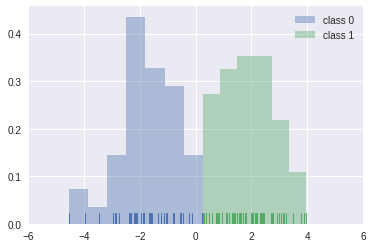

In [241]:
sns.distplot(X0, rug=True, kde=False, norm_hist=True, label="class 0")
sns.distplot(X1, rug=True, kde=False, norm_hist=True, label="class 1")
plt.legend()
plt.xlim(-6,6)
plt.show()

In [242]:
from sklearn.naive_bayes import GaussianNB
clf_norm = GaussianNB().fit(X, y)

In [243]:
clf_norm.classes_

array([ 0.,  1.])

In [244]:
clf_norm.class_count_

array([ 40.,  60.])

In [245]:
clf_norm.class_prior_

array([ 0.4,  0.6])

In [246]:
clf_norm.theta_, clf_norm.sigma_

(array([[-1.68745753],
        [ 1.89131838]]), array([[ 1.13280656],
        [ 0.8668681 ]]))

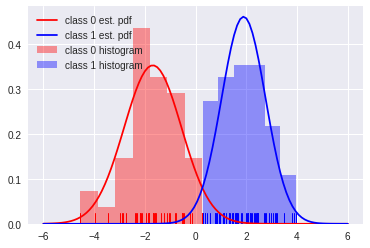

In [247]:
xx = np.linspace(-6, 6, 100)
p0 = sp.stats.norm(clf_norm.theta_[0], clf_norm.sigma_[0]).pdf(xx)
p1 = sp.stats.norm(clf_norm.theta_[1], clf_norm.sigma_[1]).pdf(xx)                                                               
sns.distplot(X0, rug=True, kde=False, norm_hist=True, color="r", label="class 0 histogram")
sns.distplot(X1, rug=True, kde=False, norm_hist=True, color="b", label="class 1 histogram")
plt.plot(xx, p0, c="r", label="class 0 est. pdf")
plt.plot(xx, p1, c="b", label="class 1 est. pdf")
plt.legend()
plt.show()

In [248]:
x_new = -1
clf_norm.predict_proba([[x_new]])

array([[ 0.98327446,  0.01672554]])

In [249]:
px = sp.stats.norm(clf_norm.theta_, np.sqrt(clf_norm.sigma_)).pdf(x_new)
px

array([[ 0.30425666],
       [ 0.00345028]])

In [250]:
p = px.flatten() * clf_norm.class_prior_
p

array([ 0.12170266,  0.00207017])

In [251]:
clf_norm.class_prior_

array([ 0.4,  0.6])

In [252]:
p / p.sum()

array([ 0.98327446,  0.01672554])

0.1일떄

In [253]:
x_nnew = 0.1
clf_norm.predict_proba([[x_nnew]])

array([[ 0.47535706,  0.52464294]])

In [254]:
px = sp.stats.norm(clf_norm.theta_, np.sqrt(clf_norm.sigma_)).pdf(x_nnew)
px

array([[ 0.09149199],
       [ 0.06731869]])

In [255]:
p = px.flatten() * clf_norm.class_prior_
p

array([ 0.03659679,  0.04039122])

In [256]:
clf_norm.class_prior_

array([ 0.4,  0.6])

In [257]:
p / p.sum()

array([ 0.47535706,  0.52464294])

## 베르누이 분포 나이브 베이즈 모형

베르누이 나이브 베이즈 모형에서는 타겟 변수뿐 아니라 독립 변수도 0 또는 1의 값을 가져야 한다. 예를 들어 전자우편과 같은 문서 내에 특정한 단어가 포함되어 있는지의 여부는 베르누이 확률 변수로 모형화할 수 있으므로 스팸 필터링에 사용할 수 있다.

In [258]:
np.random.seed(0)
X = np.random.randint(2, size=(10, 4))
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y)

[[0 1 1 0]
 [1 1 1 1]
 [1 1 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 1 0]
 [1 0 1 1]
 [0 1 1 0]]
[0 0 0 0 1 1 1 1 1 1]


In [259]:
from sklearn.naive_bayes import BernoulliNB
clf_bern = BernoulliNB().fit(X, y)

In [260]:
clf_bern.classes_

array([0, 1])

In [261]:
clf_bern.class_count_

array([ 4.,  6.])

In [262]:
np.exp(clf_bern.class_log_prior_)

array([ 0.4,  0.6])

In [263]:
fc = clf_bern.feature_count_
fc

array([[ 2.,  4.,  3.,  1.],
       [ 2.,  3.,  5.,  3.]])

In [264]:
np.repeat(clf_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[ 4.,  4.,  4.,  4.],
       [ 6.,  6.,  6.,  6.]])

In [265]:
fc / np.repeat(clf_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[ 0.5       ,  1.        ,  0.75      ,  0.25      ],
       [ 0.33333333,  0.5       ,  0.83333333,  0.5       ]])

In [266]:
theta = np.exp(clf_bern.feature_log_prob_)
theta

array([[ 0.5       ,  0.83333333,  0.66666667,  0.33333333],
       [ 0.375     ,  0.5       ,  0.75      ,  0.5       ]])

In [267]:
x_new = np.array([1, 1, 0, 0])

In [268]:
clf_bern.predict_proba([x_new])

array([[ 0.72480181,  0.27519819]])

In [269]:
p = ((theta**x_new)*(1-theta)**(1-x_new)).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.72480181,  0.27519819])

In [270]:
x_new = np.array([0, 0, 1, 1])
clf_bern.predict_proba([x_new])

array([[ 0.09530901,  0.90469099]])

In [271]:
p = ((theta**x_new)*(1-theta)**(1-x_new)).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.09530901,  0.90469099])

퀴즈문제

In [272]:
np.random.seed(0)
X = np.array([[1, 1, 0],[1,0,0,],[1,1,1,],[0,1,1],[0,0,1],[1,0,0]])
y = np.array([0,0,0,1,1,1])
print(X)
print(y)

[[1 1 0]
 [1 0 0]
 [1 1 1]
 [0 1 1]
 [0 0 1]
 [1 0 0]]
[0 0 0 1 1 1]


In [273]:
clf_bern = BernoulliNB().fit(X, y)

In [274]:
clf_bern.classes_

array([0, 1])

In [275]:
clf_bern.class_count_

array([ 3.,  3.])

In [276]:
np.exp(clf_bern.class_log_prior_)

array([ 0.5,  0.5])

In [277]:
fc = clf_bern.feature_count_
fc

array([[ 3.,  2.,  1.],
       [ 1.,  1.,  2.]])

In [278]:
fc / np.repeat(clf_bern.class_count_[:, np.newaxis], 3, axis=1)

array([[ 1.        ,  0.66666667,  0.33333333],
       [ 0.33333333,  0.33333333,  0.66666667]])

In [279]:
theta = np.exp(clf_bern.feature_log_prob_)
theta

array([[ 0.8,  0.6,  0.4],
       [ 0.4,  0.4,  0.6]])

In [280]:
x_new = np.array([1, 1, 1])
clf_bern.predict_proba([x_new])

array([[ 0.66666667,  0.33333333]])

In [281]:
x_new = np.array([1, 0, 0])
clf_bern.predict_proba([x_new])

array([[ 0.66666667,  0.33333333]])

In [282]:
x_new = np.array([0, 0, 1])
clf_bern.predict_proba([x_new])

array([[ 0.12903226,  0.87096774]])

In [283]:
p = ((theta**x_new)*(1-theta)**(1-x_new)).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.12903226,  0.87096774])

## 다항 분포 나이브 베이즈 모형

In [284]:
np.random.seed(0)
X0 = np.random.multinomial(10, [0.3, 0.5, 0.1, 0.1], size=4)
X1 = np.random.multinomial(8, [0.1, 0.1, 0.35, 0.45], size=6)
X = np.vstack([X0, X1])
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y)

[[3 4 1 2]
 [3 5 1 1]
 [3 3 0 4]
 [3 4 1 2]
 [1 2 1 4]
 [0 0 5 3]
 [1 2 4 1]
 [1 1 4 2]
 [0 1 2 5]
 [2 1 2 3]]
[0 0 0 0 1 1 1 1 1 1]


In [285]:
from sklearn.naive_bayes import MultinomialNB
clf_mult = MultinomialNB().fit(X, y)

In [286]:
clf_mult.classes_

array([0, 1])

In [287]:
clf_mult.class_count_

array([ 4.,  6.])

In [288]:
fc = clf_mult.feature_count_
fc

array([[ 12.,  16.,   3.,   9.],
       [  5.,   7.,  18.,  18.]])

In [289]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[ 0.3       ,  0.4       ,  0.075     ,  0.225     ],
       [ 0.10416667,  0.14583333,  0.375     ,  0.375     ]])

In [290]:
clf_mult.alpha

1.0

In [291]:
(fc + clf_mult.alpha) / (np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + clf_mult.alpha * X.shape[1])

array([[ 0.29545455,  0.38636364,  0.09090909,  0.22727273],
       [ 0.11538462,  0.15384615,  0.36538462,  0.36538462]])

In [292]:
theta = np.exp(clf_mult.feature_log_prob_)
theta

array([[ 0.29545455,  0.38636364,  0.09090909,  0.22727273],
       [ 0.11538462,  0.15384615,  0.36538462,  0.36538462]])

In [293]:
x_new = np.array([10, 10, 10, 10])
clf_mult.predict_proba([x_new])

array([[ 0.38848858,  0.61151142]])

In [294]:
p = (theta**x_new).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.48795115,  0.51204885])

필기한거 필히 참조, 스팸 필터 손으로 풀기 꼭 해볼 것